In [1]:
import os
import pathlib

import numpy as np
import xarray as xr

import matplotlib
from matplotlib import pyplot as plt

In [2]:
exp_postsel_fracs = xr.open_dataarray(os.path.join('exp_postsel_fracs.nc'))
ps_frac_model_scan_ds = xr.open_dataarray(os.path.join('ps_frac_model_scan_ds.nc'))
ps_frac_leak_rate_scan_ds = xr.open_dataarray(os.path.join('ps_frac_leak_rate_scan_ds.nc'))

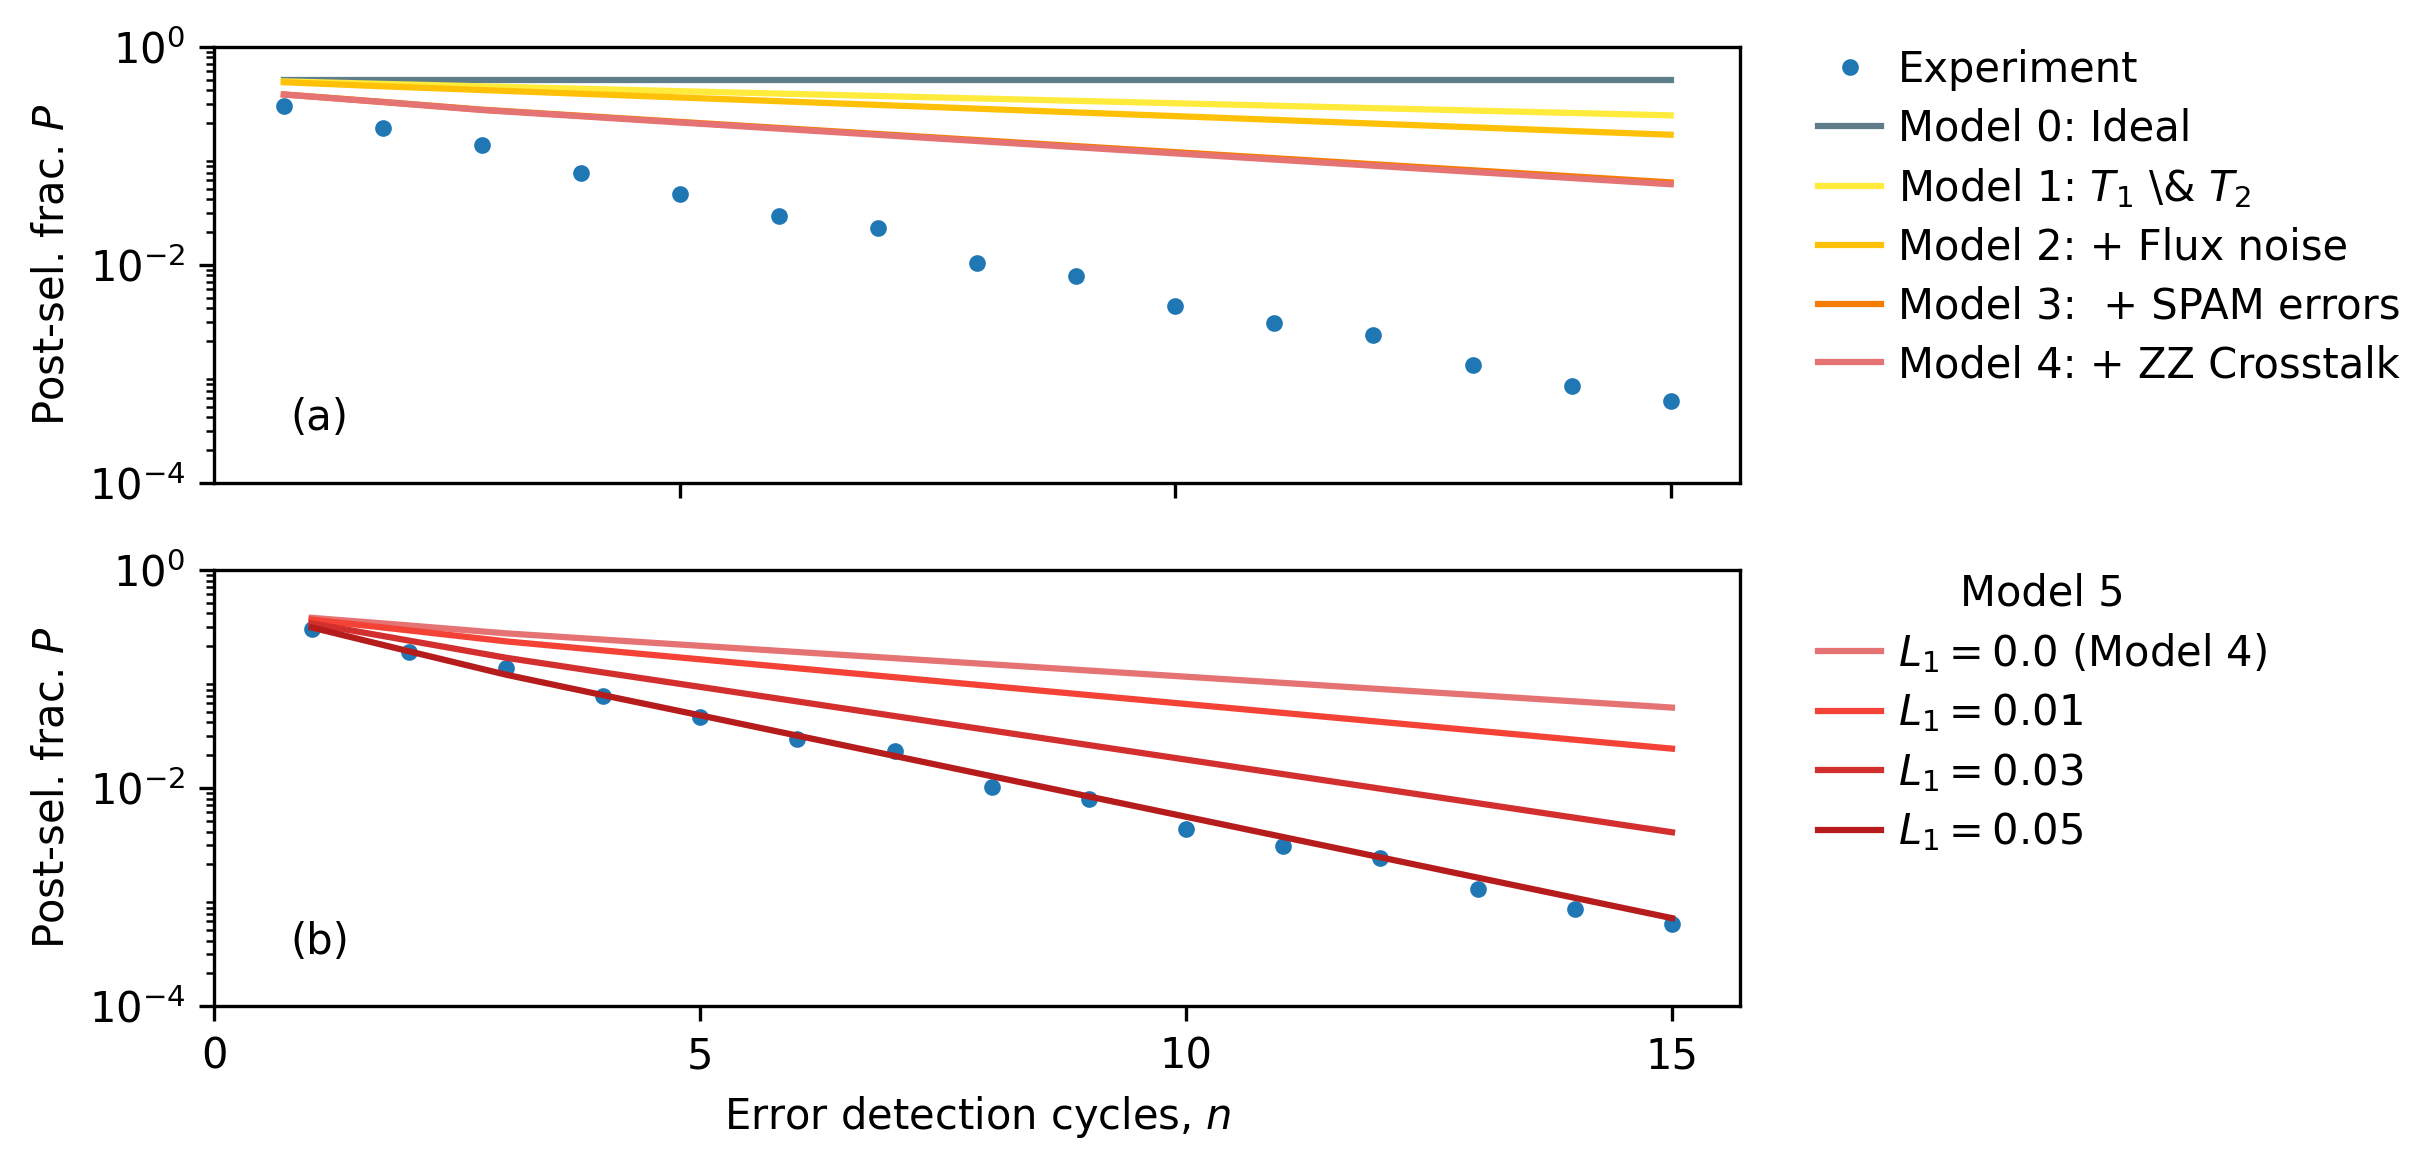

In [3]:
fig, axs = plt.subplots(2, 1, sharex=True, squeeze=True, constrained_layout=False, dpi=300)

for ax_ind in range(2):
    if ax_ind == 0:
        axs[ax_ind].errorbar(exp_postsel_fracs.cycle + 1, exp_postsel_fracs.sel(log_state=0).data, fmt='.', color='C0', label='Experiment')
    else:
        axs[ax_ind].errorbar(exp_postsel_fracs.cycle + 1, exp_postsel_fracs.sel(log_state=0).data, fmt='.', color='C0')

_model_scan_colors = ['#607d8b', '#ffeb3b', '#ffc107', '#f57c00', '#e57373']
_model_labels = [r'Ideal', r'$T_{1}$ \& $T_{2}$', r'+ Flux noise', r' + SPAM errors',  r'+ ZZ Crosstalk']
for model_num, model_label, col in zip([0, 1, 2, 3, 4], _model_labels, _model_scan_colors):
    axs[0].errorbar(ps_frac_model_scan_ds.cycle, ps_frac_model_scan_ds.sel(model = model_num), fmt='-', label='Model ' + str(model_num) + ': ' + model_label, color=col)

_leak_scan_colors = ['#e57373', '#f44336', '#d32f2f', '#b71c1c']    
for ds, col in zip(ps_frac_leak_rate_scan_ds, _leak_scan_colors):
    if ds.leak_rate == 0:
        _label = r'$L_{1}=%s$ (Model 4)'  % ds.leak_rate.data
    else:
        _label = r'$L_{1}=%s$'  % ds.leak_rate.data
    axs[1].errorbar(ds.cycle, ds, fmt='-', label=_label, color=col)
    
for ax_ind, subplot_label, legend_title in zip([0, 1], ['a', 'b'], [None, 'Model 5']):
    axs[ax_ind].set_yscale('log')
    axs[ax_ind].set_ylabel(r'Post-sel. frac. $P$')
    axs[ax_ind].set_yticks([1e-4, 1e-2, 1])
    axs[ax_ind].text(0.05, 0.1, r'(%s)' % subplot_label, transform=axs[ax_ind].transAxes, ha='left', va='bottom')

axs[1].set_xticks([0, 5, 10, 15])
axs[1].set_xlabel(r'Error detection cycles, $n$')

plt.tight_layout()

for ax_ind, subplot_label, legend_title in zip([0, 1], ['a', 'b'], [None, 'Model 5']):
    axs[ax_ind].legend(frameon=False, 
                       bbox_to_anchor=(1.05, 1),
                       loc='upper left',
                       title=legend_title,
                       handletextpad=0.4,
                       labelspacing=0.4,
                       borderpad=0,
                       markerscale=1.0,
                       handlelength=1.5,
                       borderaxespad=0.05,
                       columnspacing=0.4)
   
plt.show()